In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Tabular Data

## Preprocess Tabular Data

### Training data

In [4]:
train_df= pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DF/HAM10000_metadata.csv")

In [5]:
# Check datatype
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB


In [6]:
train_df = train_df[['image_id','dx','dx_type', 'age', 'sex', 'localization']]

In [7]:
train_df.head()

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


#### One-Hot Encode Categorical Variables

In [8]:
# Perform one-hot encoding on the specified columns
train_df = pd.get_dummies(train_df, columns=['dx_type', 'sex', 'localization'])

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_id                      10015 non-null  object 
 1   dx                            10015 non-null  object 
 2   age                           9958 non-null   float64
 3   dx_type_confocal              10015 non-null  uint8  
 4   dx_type_consensus             10015 non-null  uint8  
 5   dx_type_follow_up             10015 non-null  uint8  
 6   dx_type_histo                 10015 non-null  uint8  
 7   sex_female                    10015 non-null  uint8  
 8   sex_male                      10015 non-null  uint8  
 9   sex_unknown                   10015 non-null  uint8  
 10  localization_abdomen          10015 non-null  uint8  
 11  localization_acral            10015 non-null  uint8  
 12  localization_back             10015 non-null  uint8  
 13  l

#### Normalize Numerical Data (Min=0, Max=100)

In [10]:
# Predefined min and max values
min_predefined = 0
max_predefined = 100

# Normalize the "age" column using the predefined min and max
train_df['age_normalized'] = (train_df['age'] - min_predefined) / (max_predefined - min_predefined)

# To ensure all values fall within [0, 1], you can clip values outside this range
train_df['age_normalized'] = train_df['age_normalized'].clip(lower=0, upper=1)

# Drop the "age" column
train_df.drop('age', axis=1, inplace=True)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_id                      10015 non-null  object 
 1   dx                            10015 non-null  object 
 2   dx_type_confocal              10015 non-null  uint8  
 3   dx_type_consensus             10015 non-null  uint8  
 4   dx_type_follow_up             10015 non-null  uint8  
 5   dx_type_histo                 10015 non-null  uint8  
 6   sex_female                    10015 non-null  uint8  
 7   sex_male                      10015 non-null  uint8  
 8   sex_unknown                   10015 non-null  uint8  
 9   localization_abdomen          10015 non-null  uint8  
 10  localization_acral            10015 non-null  uint8  
 11  localization_back             10015 non-null  uint8  
 12  localization_chest            10015 non-null  uint8  
 13  l

#### Missing values

In [12]:
train_df.isnull().sum().sort_values(ascending=False)

age_normalized                  57
localization_ear                 0
localization_upper extremity     0
localization_unknown             0
localization_trunk               0
localization_scalp               0
localization_neck                0
localization_lower extremity     0
localization_hand                0
localization_genital             0
localization_foot                0
localization_face                0
image_id                         0
dx                               0
localization_back                0
localization_acral               0
localization_abdomen             0
sex_unknown                      0
sex_male                         0
sex_female                       0
dx_type_histo                    0
dx_type_follow_up                0
dx_type_consensus                0
dx_type_confocal                 0
localization_chest               0
dtype: int64

Replace missing values with the mean.

In [13]:
train_df['age_normalized'] = train_df['age_normalized'].fillna(train_df['age_normalized'].mean())

#### EDA

one-hot encoding dx

In [14]:
# Perform one-hot encoding on the specified columns
train_df = pd.get_dummies(train_df, columns=['dx'])

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   image_id                      10015 non-null  object 
 1   dx_type_confocal              10015 non-null  uint8  
 2   dx_type_consensus             10015 non-null  uint8  
 3   dx_type_follow_up             10015 non-null  uint8  
 4   dx_type_histo                 10015 non-null  uint8  
 5   sex_female                    10015 non-null  uint8  
 6   sex_male                      10015 non-null  uint8  
 7   sex_unknown                   10015 non-null  uint8  
 8   localization_abdomen          10015 non-null  uint8  
 9   localization_acral            10015 non-null  uint8  
 10  localization_back             10015 non-null  uint8  
 11  localization_chest            10015 non-null  uint8  
 12  localization_ear              10015 non-null  uint8  
 13  l

In [25]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
# Cramér's V calculation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

Compare corelation of dx_type and dx.

In [37]:
# Lists of variables to compare
dx_type_cols = ['dx_type_confocal', 'dx_type_consensus', 'dx_type_follow_up', 'dx_type_histo']
dx_cols = ['dx_akiec', 'dx_bcc', 'dx_bkl', 'dx_df', 'dx_mel', 'dx_nv', 'dx_vasc']

In [38]:
# Initialize a DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(dx_type_cols), len(dx_cols))), index=dx_type_cols, columns=dx_cols)

In [39]:
# Calculate Cramér's V for each pair of variables
for dx_type_col in dx_type_cols:
    for dx_col in dx_cols:
        cramers_v_matrix.loc[dx_type_col, dx_col] = cramers_v(train_df[dx_type_col], train_df[dx_col])

# Display the matrix
print(cramers_v_matrix)

                   dx_akiec    dx_bcc    dx_bkl     dx_df    dx_mel     dx_nv  \
dx_type_confocal   0.006473  0.013303  0.235108  0.000000  0.025655  0.116842   
dx_type_consensus  0.055936  0.071696  0.183327  0.160580  0.110243  0.073764   
dx_type_follow_up  0.139817  0.177449  0.268464  0.080988  0.270388  0.537985   
dx_type_histo      0.171054  0.216956  0.114519  0.004427  0.330392  0.457986   

                    dx_vasc  
dx_type_confocal   0.000000  
dx_type_consensus  0.181792  
dx_type_follow_up  0.090456  
dx_type_histo      0.009671  


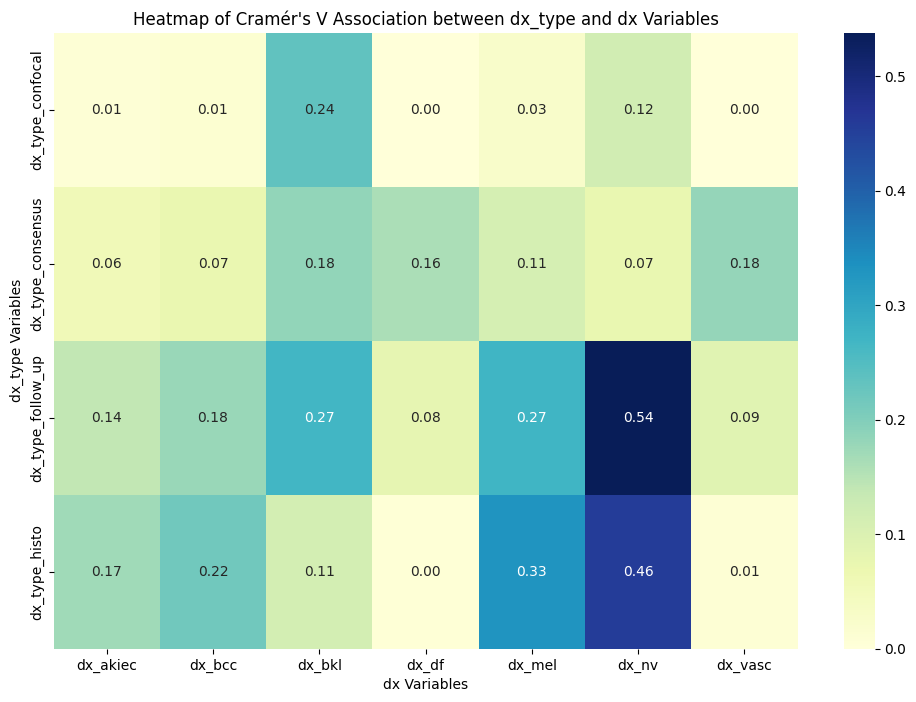

In [40]:
# Assuming 'cramers_v_matrix' is your DataFrame containing the Cramér's V values

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap, add annotations and a color map
sns.heatmap(cramers_v_matrix, annot=True, cmap='YlGnBu', fmt=".2f")

# Add labels and a title if needed
plt.title('Heatmap of Cramér\'s V Association between dx_type and dx Variables')
plt.xlabel('dx Variables')
plt.ylabel('dx_type Variables')

# Display the heatmap
plt.show()


SEX VS dx

In [41]:
# Lists of variables for comparison
sex_cols = ['sex_female', 'sex_male', 'sex_unknown']
dx_cols = ['dx_akiec', 'dx_bcc', 'dx_bkl', 'dx_df', 'dx_mel', 'dx_nv', 'dx_vasc']

# Initialize a DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(sex_cols), len(dx_cols))), index=sex_cols, columns=dx_cols)

# Reusing the Cramér's V function defined earlier

# Calculate Cramér's V for each pair of variables
for sex_col in sex_cols:
    for dx_col in dx_cols:
        cramers_v_matrix.loc[sex_col, dx_col] = cramers_v(train_df[sex_col], train_df[dx_col])


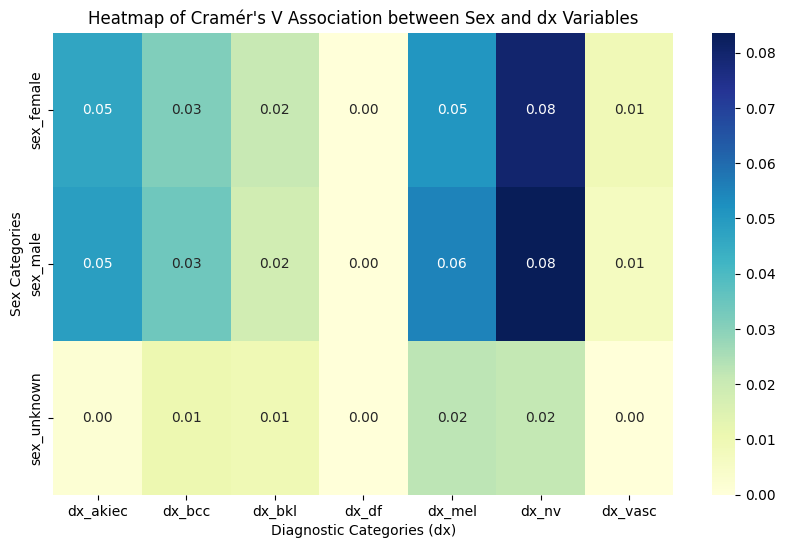

In [42]:
# Assuming 'cramers_v_matrix' contains the Cramér's V values calculated above

# Set the size of the heatmap
plt.figure(figsize=(10, 6))

# Create the heatmap, add annotations and a color map
sns.heatmap(cramers_v_matrix, annot=True, cmap='YlGnBu', fmt=".2f")

# Add labels and a title for clarity
plt.title('Heatmap of Cramér\'s V Association between Sex and dx Variables')
plt.xlabel('Diagnostic Categories (dx)')
plt.ylabel('Sex Categories')

# Display the heatmap
plt.show()


local vs. dx

In [43]:
# Lists of variables for comparison
localization_cols = [
    'localization_abdomen', 'localization_acral', 'localization_back',
    'localization_chest', 'localization_ear', 'localization_face',
    'localization_foot', 'localization_genital', 'localization_hand',
    'localization_lower extremity', 'localization_neck', 'localization_scalp',
    'localization_trunk', 'localization_unknown', 'localization_upper extremity'
]
dx_cols = [
    'dx_akiec', 'dx_bcc', 'dx_bkl', 'dx_df', 'dx_mel', 'dx_nv', 'dx_vasc'
]

# Initialize a DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((len(localization_cols), len(dx_cols))), index=localization_cols, columns=dx_cols)

# Reusing the Cramér's V function defined in previous examples

# Calculate Cramér's V for each pair of variables
for loc_col in localization_cols:
    for dx_col in dx_cols:
        cramers_v_matrix.loc[loc_col, dx_col] = cramers_v(train_df[loc_col], train_df[dx_col])


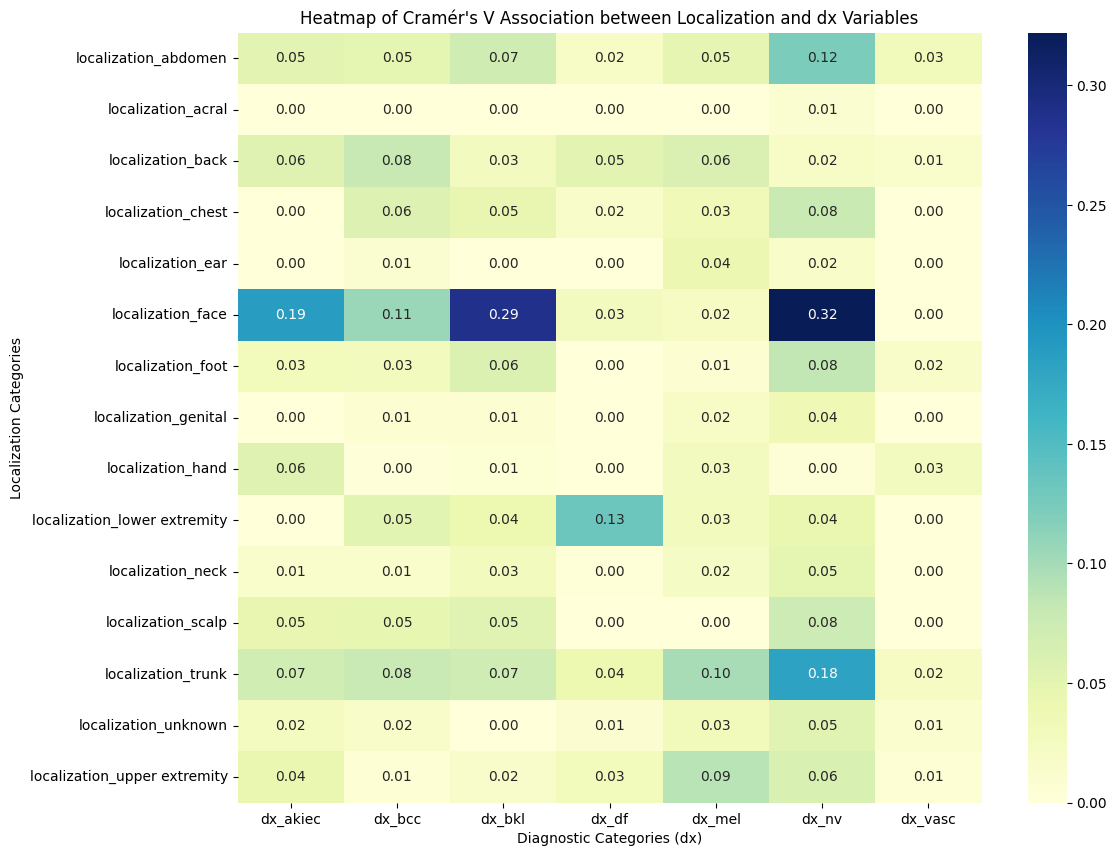

In [44]:
# Assuming 'cramers_v_matrix' contains the Cramér's V values calculated above

# Set the size of the heatmap
plt.figure(figsize=(12, 10))

# Create the heatmap, add annotations and a color map
sns.heatmap(cramers_v_matrix, annot=True, cmap='YlGnBu', fmt=".2f")

# Add labels and a title for clarity
plt.title('Heatmap of Cramér\'s V Association between Localization and dx Variables')
plt.xlabel('Diagnostic Categories (dx)')
plt.ylabel('Localization Categories')

# Display the heatmap
plt.show()
